<a href="https://colab.research.google.com/github/RishikaVashishtha/Projects/blob/main/Assignement_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1: Exploring Data


### **i. Dataset Overview**


#### **a. How many examples of each class are in the training set?**

In [ ]:
import numpy as np

training = np.loadtxt('Xtrain.csv')
training_dimensions = training.shape
print(training)

print(training_dimensions)


ytraining = np.loadtxt('Ytrain.csv')
ytraining_dimensions = ytraining.shape
print(ytraining)

print(ytraining_dimensions)

print("Number of +1 labels", np.shape(ytraining[ytraining == 1]))

print("Number of -1 labels", np.shape(ytraining[ytraining == -1]))

print(614 + 2386)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(3000, 784)
[-1. -1. -1. ...  1. -1. -1.]
(3000,)
Number of +1 labels (614,)
Number of -1 labels (2386,)
3000


 <span style="color: green;"> **Thus there are total 3000 examples in the training set. Out of these, 614 examples have the label of +1 while 2386 examples have the label of -1.** </span>


####  **And in the test set?**


In [ ]:
testing = np.loadtxt('Xtest.csv')
testing_dimensions = testing.shape
print(testing)

print(testing_dimensions)

[[ 0.  0.  0. ...  0.  0. 14.]
 [ 7.  0.  0. ... 20. 40. 35.]
 [17. 56.  0. ... 38.  0.  0.]
 ...
 [ 0. 83.  0. ...  0.  0.  0.]
 [ 0.  0. 22. ... 22. 50.  0.]
 [ 0.  0.  0. ... 92.  0.  8.]]
(3000, 784)


<span style="color: green;">  

**Thus there are 3000 examples in the test set.**

</span>

#### **b. Does this distribution of positive and negative examples signifiy any potential issues in terms of design of the machine learning solution and its evaluation? If so, please explain.**

 <span style="color: PaleVioletRed;"> Yes, this distribution of positive and negative examples signifiy potential issues in terms of design of the machine elarning soltution and it's evaluation. Since the number of examples in the two classes is 614 and 2386 respectively, there is a class imbalance because of which measures like accuracy won't be a good measure to determine model performance. Additionally, evaluation metrics like ROC, F1 scores, and PR AUC are better suited to evaluate data with a class imbalance.</span>

<span style="color: PaleVioletRed;"> Additionally, there may be skewed decision boundaries where classifiers place the boundaries closer to the minority class.</span>  

<span style="color: PaleVioletRed;">Because of the majority of one class, the classifier might ignore the minority class and overfit to the majority class, which may lead to poor generalization.</span>  


 </span>

### **ii. Visual Data Exploration**

#### **a. Pick 10 random objects from each class in the training data and display them using plt.matshow. Reshape the flattened 28x28 arrays for this. What patterns or characteristics do you notice?**


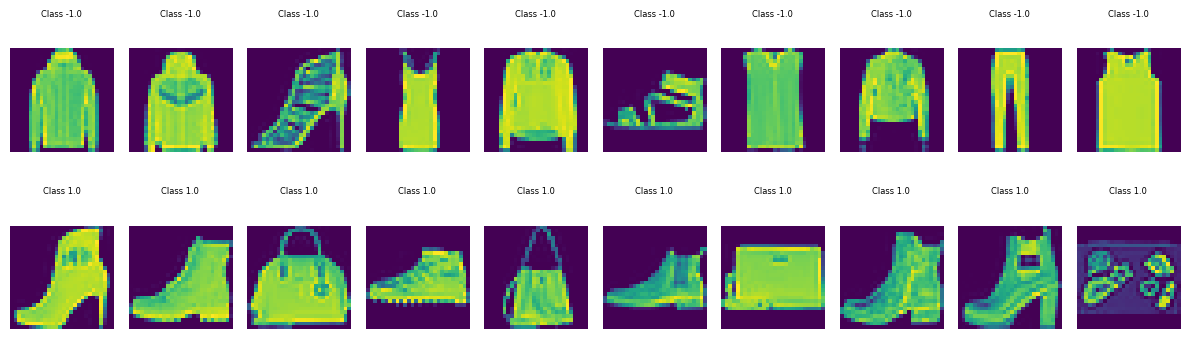

In [ ]:
import matplotlib.pyplot as plt

def plot_random_objects_by_class(training, ytraining):
    unique_classes = np.unique(ytraining)
    num_classes = len(unique_classes)
    num_samples_per_class = 10

    plt.figure(figsize=(12, num_classes * 2))

    for i, class_label in enumerate(unique_classes):
        # Filter by class
        class_indices = np.where(ytraining == class_label)[0]
        # Select 10 random indices from this class
        selected_indices = np.random.choice(class_indices, size=min(len(class_indices), num_samples_per_class), replace=False)

        for j, idx in enumerate(selected_indices):
            plt.subplot(num_classes, num_samples_per_class, i * num_samples_per_class + j + 1)
            plt.matshow(training[idx].reshape(28, 28), fignum=False)
            plt.axis('off')
            plt.title(f"Class {class_label}", fontsize=6)

    plt.tight_layout()
    plt.show()

# Run the function
plot_random_objects_by_class(training, ytraining)

<span style="color: PaleVioletRed;"> **It can be seen that the class labels -1 represents clothes whereas the class label +1 shows accessories like a bag/shoe.** </span>

#### **b. Do the same for 10 random objects from the test set. Are there any peculiarities in the data that might challenge your classifier's ability to generalize?**

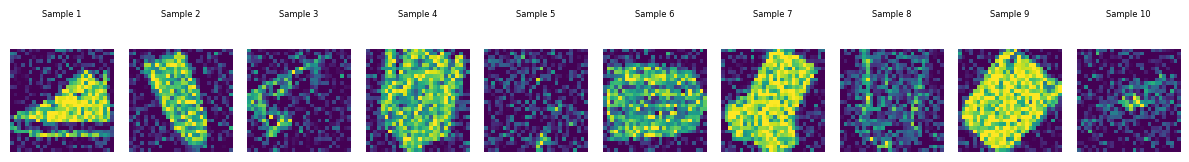

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_random_test_objects(testing):
    num_samples = 10  # Number of random samples to display

    # Select 10 random indices
    selected_indices = np.random.choice(testing.shape[0], size=num_samples, replace=False)

    plt.figure(figsize=(12, 3))

    for i, idx in enumerate(selected_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.matshow(testing[idx].reshape(28, 28), fignum=False)
        plt.axis('off')
        plt.title(f"Sample {i + 1}", fontsize=6)

    plt.tight_layout()
    plt.show()

# Example usage with your test data
plot_random_test_objects(testing)



### **iii. Choosing the Right Metric**



<span style="color: PaleVioletRed;"> **Yes, there are pecularities in the data that might challenge the classifier's ability to generalise.**

<ul>
    <li><span style="color: PaleVioletRed;">The testing data has several pixels missing, which makes it unclear.</span></li>
    <li><span style="color: PaleVioletRed;">Additionally, the orientation of the training set is different from the test set. This can obscure important details in the images, which makes it harder for the classifier to de </ul>

<span style="color: PaleVioletRed;">

Since the model wasn't trained to handle such scenarios, it might overemphasize noise as meaningful patterns, leading to poor predictions or misclassifications. </span>




#### **Which performance metric would be best for this task (accuracy, AUC-ROC, AUC-PR, F1, Matthews correlation coefficient, mean squared error etc.)? Define each metric and discuss your reasoning for this choice.**


#### **Key Performance Metrics for Classification Tasks**

#### **1. Accuracy**
- **Definition:** The proportion of correctly classified samples.  
- Misleading in imbalanced datasets, as predicting only the majority class can yield high accuracy.


#### **2. AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**
- **Definition:** Measures the trade-off between the true positive rate (sensitivity) and false positive rate (1 - specificity) across different thresholds.  
- AUC-ROC close to 1 indicates good model discrimination between classes.


#### **3. AUC-PR (Area Under the Precision-Recall Curve)**
- **Definition:** Focuses on the balance between precision and recall, especially for the positive class.  
- More informative when dealing with imbalanced datasets, as it emphasizes performance on the minority class.

#### **4. F1 Score**
- **Definition:** The harmonic mean of precision and recall, balancing false positives and false negatives.  
- Suitable for imbalanced datasets, particularly when both false positives and false negatives matter.


#### **5. Matthews Correlation Coefficient (MCC)**
- A balanced measure considering all four confusion matrix components (TP, TN, FP, FN).  
- Provides a single metric that remains informative even with imbalanced data.


#### **6. Mean Squared Error (MSE)**
- Measures the average squared difference between predicted and true values.  
- Not suitable for classification tasks.


<span style="color: PaleVioletRed;">The metric I would choose is **AUC-PR**. This is because the data is imabalanced and AUC-PR is the best metric because it focuses on positive class performance rather than overall classification performance. Since the number of positive classes in data is very less compared to the negative class, it is the best metric to assess the performance of the model</span>

### **iv. Benchmarking a Random Classifier**
#### **Imagine a classifier that produces a random prediction score in the range [-1,+1] for a given input example. What accuracy would you expect it to achieve on both the training and test datasets? Show this through a coding experiment.**


<span style="color: PaleVioletRed;">I would expect the accuracy to be about **50 percent**. This is because since the prediction score is random, the probability of getting the correct prediction and getting incorrect predictions is equal. Since accuracy is the precentage of correct predictions, I would expect the accuracy to be 50 percent.</span>

In [ ]:
from sklearn.metrics import accuracy_score

# Number of samples for training and testing
total_samples_train = 1000
total_samples_test = 1000

# Generating random labels for training and test set
y_train = np.random.choice([-1, 1], total_samples_train)
y_test = np.random.choice([-1, 1], total_samples_test)

# Generate random prediction scores given by the classifier in the range [-1, 1]
#Here uniform distribution is used to generate random scores because each prediction score has the same probability of being generated
pred_train_scores = np.random.uniform(-1, 1, total_samples_train)
pred_test_scores = np.random.uniform(-1, 1, total_samples_test)

# Convert prediction scores to class predictions (-1 or 1)
pred_train = np.where(pred_train_scores >= 0, 1, -1)
pred_test = np.where(pred_test_scores >= 0, 1, -1)

# Compute accuracy for training and test sets
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)

print("Random Classifier Performance:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")



Random Classifier Performance:
Training Accuracy: 0.52
Test Accuracy: 0.50


### **v. Understanding AUC Metrics for Random Classifier**
#### **What would be the AUC-ROC and AUC-PR for a random classifier in this context? Again, support your answer with a code and discuss the consequences.**


<span style="color: PaleVioletRed;"> **I would expect the auc-roc and auc-pr scores to be about 50 percent. Since the prediction score is random, the probability of getting the correct prediction and getting incorrect predictions is equal.**

 - Since AUC-ROC curve plots TPR and FPR, equal probability of classifying a sample as positive or negative will result in the slope being approximately 1 - which means that the aread under the curve would would be 0.50.

 - Additionally, since the AUC-PR plots the number of positively classified samples and total sample versus the total samples, the equal probability of positive and negative samples will yield the score as 0.5 again.

</span>

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score

# Number of samples for training and testing
total_samples_train = 1000
total_samples_test = 500

# Generate random labels (-1 or 1) for training and testing
y_train = np.random.choice([0, 1], total_samples_train)  # Use binary labels for AUC compatibility
y_test = np.random.choice([0, 1], total_samples_test)

# Generate random prediction scores in the range [-1, 1]
pred_train_scores = np.random.uniform(-1, 1, total_samples_train)
pred_test_scores = np.random.uniform(-1, 1, total_samples_test)

# Convert prediction scores to class predictions (0 or 1)
pred_train = np.where(pred_train_scores >= 0, 1, 0)
pred_test = np.where(pred_test_scores >= 0, 1, 0)

# Compute AUC-ROC and AUC-PR for training and test sets
auc_roc_train = roc_auc_score(y_train, pred_train_scores)
auc_roc_test = roc_auc_score(y_test, pred_test_scores)
auc_pr_train = average_precision_score(y_train, pred_train_scores)
auc_pr_test = average_precision_score(y_test, pred_test_scores)

print("Random Classifier Performance:")
print(f"Training AUC-ROC: {auc_roc_train:.2f}")
print(f"Test AUC-ROC: {auc_roc_test:.2f}")
print(f"Training AUC-PR: {auc_pr_train:.2f}")
print(f"Test AUC-PR: {auc_pr_test:.2f}")


Random Classifier Performance:
Training AUC-ROC: 0.50
Test AUC-ROC: 0.51
Training AUC-PR: 0.52
Test AUC-PR: 0.55


# 2. Nearest Neighbor Classifier

### **Perform 5-fold stratified cross-validation (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) over the training dataset using a k-nearest neighbour (kNN) classifier and answer the following questions:**



### i. **Start with a k = 5 nearest neighbour classifier. Define and calculate the accuracy, balanced accuracy, AUC-ROC, AUC-PR, F1 and Matthews Correlation Coefficient for each fold using this classifier? Show code to demonstrate the results. Calculate the average and standard deviation for each metric across all folds and show these in a single table. As the KNN classifier in sklearn does not support decision_function, be sure to understand and use the predict_proba function for AUC-ROC and AUC-PR calculations or plotting.**


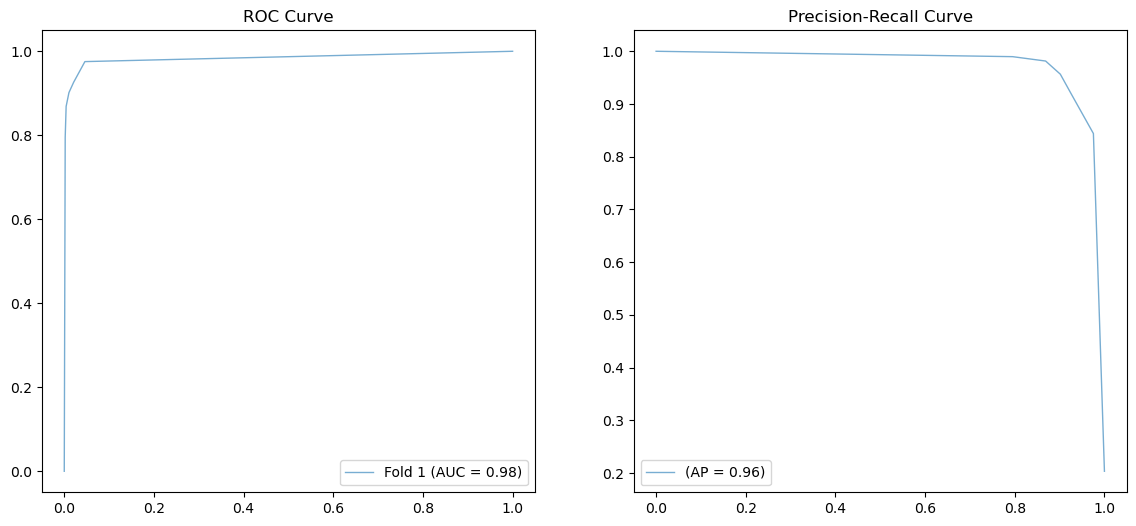

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import (balanced_accuracy_score,f1_score, accuracy_score,roc_auc_score, average_precision_score, precision_recall_curve, matthews_corrcoef, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, auc)

#To make sure that the curves are plotted only once
plot_curves = True

knc = KNeighborsClassifier()

accuracy_list = []
balanced_accuracy_score_list = []
roc_auc_score_list = []
precision_recall_auc_list = []
f1_score_list = []
matthews_corrcoef_list = []


# Cross-validation and bootstrapping for confidence intervals
skf = StratifiedKFold(n_splits=5, shuffle=True)
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)
tprs = []  # For ROC
precisions = []  # For PR
aucs = []  # ROC AUCs
aps = []  # Average Precisions (APs)

# Plot ROC and PR for each fold
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
roc_ax, pr_ax = axes


skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(training, ytraining):

    X1_train, X1_test = training[train_index], training[test_index]
    y1_train, y1_test = ytraining[train_index], ytraining[test_index]

    knc.fit(X1_train, y1_train)
    prediction = knc.predict(X1_test)

    # Calculating Accuracy
    accuracy = accuracy_score(y1_test, prediction)
    accuracy_list.append(accuracy)

    # Calculating Balanced Accuracy
    balanced_accuracy = balanced_accuracy_score(y1_test, prediction)
    balanced_accuracy_score_list.append(balanced_accuracy)

    # Calculating F1 score
    f1 = f1_score(y1_test, prediction)
    f1_score_list.append(f1)

    # Calculating Matthews Correlation Coefficient
    matthews_correlation_coefficient = matthews_corrcoef(y1_test, prediction)
    matthews_corrcoef_list.append(matthews_correlation_coefficient)

    # Get predicted probabilities for positive class
    y_pred_prob = knc.predict_proba(X1_test)[:, 1]

    # Calculating AUC-ROC
    auc_roc = roc_auc_score(y1_test, y_pred_prob)
    roc_auc_score_list.append(auc_roc)

    # Calculating AUC-PR
    auc_pr = average_precision_score(y1_test, y_pred_prob)
    precision_recall_auc_list.append(auc_pr)

    if plot_curves:
    # ROC Curve
        fpr, tpr, _ = roc_curve(y1_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0  # Ensure TPR starts at 0
        aucs.append(roc_auc)
        roc_ax.plot(fpr, tpr, lw=1, alpha=0.6, label=f"Fold {1} (AUC = {roc_auc:.2f})")

        # PR Curve
        precision, recall, _ = precision_recall_curve(y1_test, y_pred_prob)
        precisions.append(np.interp(mean_recall, recall[::-1], precision[::-1]))
        ap = average_precision_score(y1_test, y_pred_prob)
        aps.append(ap)
        pr_ax.plot(recall, precision, lw=1, alpha=0.6, label=f"(AP = {ap:.2f})")

        roc_ax.set_title("ROC Curve")
        roc_ax.legend()
        pr_ax.set_title("Precision-Recall Curve")
        pr_ax.legend()
        plt.show()

        plot_curves = False

In [ ]:
# Accuracy
print("Mean Accuracy:", np.mean(accuracy_list))
print("Std Accuracy:", np.std(accuracy_list))

# Balanced Accuracy
print("Mean Balanced Accuracy:", np.mean(balanced_accuracy_score_list))
print("Std Balanced Accuracy:", np.std(balanced_accuracy_score_list))

# F1 Score
print("Mean F1 Score:", np.mean(f1_score_list))
print("Std F1 Score:", np.std(f1_score_list))

# Matthews Correlation Coefficient
print("Mean MCC:", np.mean(matthews_corrcoef_list))
print("Std MCC:", np.std(matthews_corrcoef_list))

# AUC-ROC
print("Mean AUC-ROC:", np.mean(roc_auc_score_list))
print("Std AUC-ROC:", np.std(roc_auc_score_list))

# AUC-PR
print("Mean AUC-PR:", np.mean(precision_recall_auc_list))
print("Std AUC-PR:", np.std(precision_recall_auc_list))


Mean Accuracy: 0.9640000000000001
Std Accuracy: 0.0047842333648024414
Mean Balanced Accuracy: 0.9410788440253135
Std Balanced Accuracy: 0.0043874157518155954
Mean F1 Score: 0.9113294787930999
Std F1 Score: 0.010619950129642288
Mean MCC: 0.8889818663150688
Std MCC: 0.0138663169860783
Mean AUC-ROC: 0.9741396953669959
Std AUC-ROC: 0.012656260671765628
Mean AUC-PR: 0.9365951270194263
Std AUC-PR: 0.017644103981843018


In [ ]:
#Installation code for prettytable
!pip install PrettyTable

In [ ]:

from prettytable import PrettyTable
import pandas as pd
df = pd.DataFrame({
    'Accuracy Score': accuracy_list,
    'Balanced Accuracy Score': balanced_accuracy_score_list,
    'F1 score': f1_score_list,
    'Mattews Correlation Coefficient': matthews_corrcoef_list,
    'AUC-ROC': roc_auc_score_list,
    'AUC-PR' : precision_recall_auc_list
})

table = PrettyTable()

# Set field names (column names from the DataFrame)
table.field_names = df.columns

for row in df.values:
    table.add_row(row)

# Print the table
print(table)

+--------------------+-------------------------+--------------------+---------------------------------+--------------------+--------------------+
|   Accuracy Score   | Balanced Accuracy Score |      F1 score      | Mattews Correlation Coefficient |      AUC-ROC       |       AUC-PR       |
+--------------------+-------------------------+--------------------+---------------------------------+--------------------+--------------------+
| 0.9716666666666667 |    0.945589546608135    | 0.9282700421940927 |        0.9112531943004681       | 0.9838037588311955 | 0.9598323911450605 |
| 0.9583333333333334 |    0.9375926778135706   | 0.8987854251012146 |        0.8725643562822575       | 0.9773482640486783 | 0.9435003773844934 |
|        0.96        |    0.9416577184639771   | 0.903225806451613  |        0.8780631558035229       | 0.9828961497162142 | 0.9331178682431005 |
| 0.9666666666666667 |    0.9458505905813774   | 0.9180327868852458 |        0.8971615349351983       | 0.9772289546794839 |

### ii. **Plot the ROC and PR curves for one fold. What are your observations about the ROC and PR curves? What  part of the ROC curve is more important for this problem and why?**

 <span style="color: PaleVioletRed;">

(ROC and PR curves plotted above)

 - The ROC curve is close to the top left corner which indicates high discrimination ability. The area under the curve is 0.98 which suggests a high discriminative power between classes.

 - The PR curve is also close to the top right corner, which indicates high precision and recall values with the area under the curve being 0.93.

 The left top part of the ROC curve is most important. The closer the curve is to the boundary there, the better the classifier is. This is because high values in that region indicates low false positives, and high true positives, which is desirable in a classification model.

 </span>

# 3. Cross-validation of SVM and RFs

#### **Use 5-fold stratified cross-validation over training data to choose an optimal classifier between: SVMs (linear, polynomial kernels and Radial Basis Function Kernels) and Random Forest Classifiers. Be sure to tune the hyperparameters of each classifier type (C and kernel type and kernel hyper-parameters for SVMs, the number of trees, depth of trees etc. for the Random Forests etc). Report the cross validation results (mean and standard deviation of accuracy, balanced accuracy, AUC-ROC and AUC-PR across fold) of your best model. You may look into grid search as well as ways of pre-processing data (https://scikit-learn.org/stable/modules/preprocessing.html ) (e.g., mean-standard deviation or standard scaling or min-max scaling).**




#### i) **Write your strategy for selecting the optimal classifier. Show code to demonstrate the results for each classifier**


 <span style="color: PaleVioletRed;">

The strategy for selecting the optimal classifier is to utilise Grid Search. Initially, a Grid Search was performed over parameters with large intervals in their values. This will help find the interval in which the optimal parameter is situated. This will further narrow down the parameters. Then an additional grid search would be performed with the intervals that were shortlisted in the first grid search (not presented in the final code block due to so many tries). This will help reduce computational power needed to find precise hyperparameters in the final model.

Additionally, the grid search was optimised to the parameter average precision score since that is the parameter that was deemed best for the data with it's class imbalance

Additionally, preprocessing was done using StandardScalar to standardise the featres by removing the mean and scaling them into unit variance.

Higher C value prioritizes correct classification of training examples, but may lead to overfitting while a lower C allows for more misclassification but may generalize better. Thus, conscious decision was made for the least value of C in the grid search to be 1 since a lesser value wouldn't allow for regularisation and may affect the generalisation of the model. This is because C controls the trade off between achieveing a low training error and a low testing error.
</span>

#### **Optimisation for SVM**

In [ ]:
from sklearn import preprocessing

#Can also use fit_transform
scaler = preprocessing.StandardScaler().fit(training)
scaled_training = scaler.transform(training)

#Performing Grid Search
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# fitting linear SVM classifier
svm_1 = SVC(probability= True)

#### **Linear Kernel**

In [ ]:
#First Grid Search

# grid search for hyperparameters for linear svm
parameters=[{
    'C':[1,10,100,1000],
    'gamma': [ 0.01, 0.1, 1],
    'kernel': ['linear'],
    'class_weight': ['balanced'],
}]

#CV = 5 since the number of folds are 5

grid_search_1=GridSearchCV(estimator=svm_1,param_grid=parameters,cv=5, scoring= 'average_precision')
grid_search_1.fit(scaled_training, ytraining)


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'class_weight': ['balanced'],
                          'gamma': [0.01, 0.1, 1], 'kernel': ['linear']}],
             scoring='average_precision')

In [ ]:
grid_search_1.best_params_

{'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'linear'}

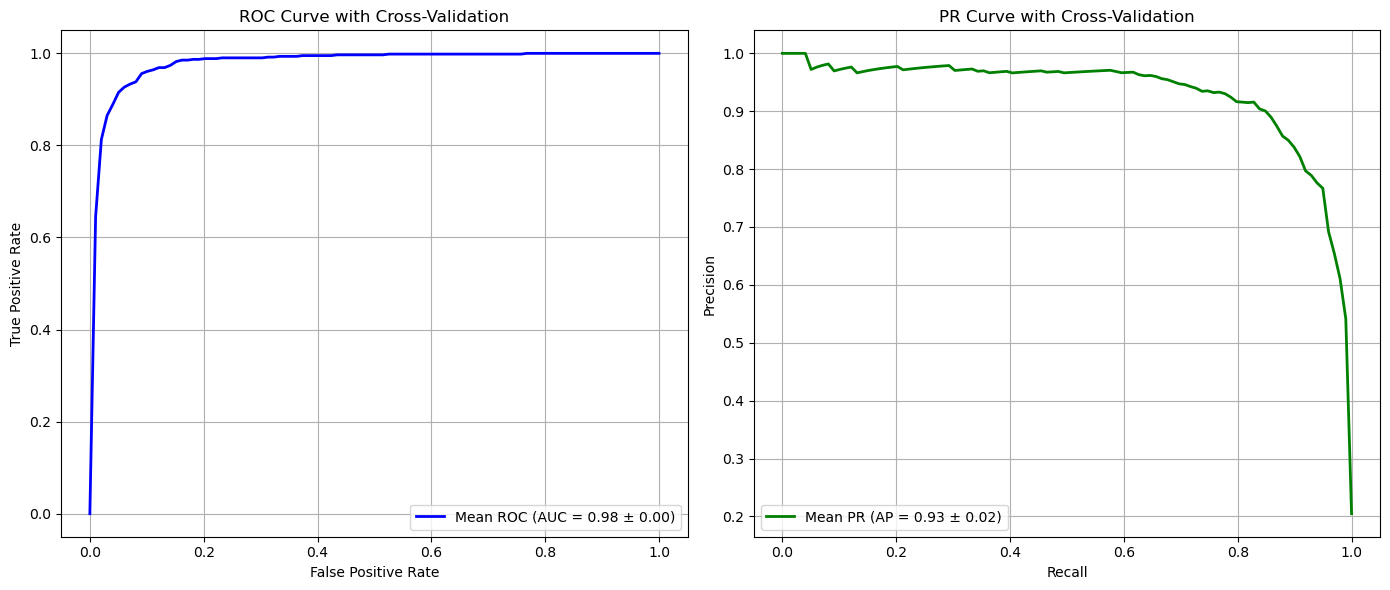

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import (balanced_accuracy_score,f1_score, accuracy_score,roc_auc_score, average_precision_score, precision_recall_curve, matthews_corrcoef, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, auc)

#To make sure that the curves are plotted only once
plot_curves = True

svm_linear = SVC(C= 1, class_weight='balanced', gamma= 0.01, kernel= 'linear', probability= True)

accuracy_list = []
balanced_accuracy_score_list = []
roc_auc_score_list = []
precision_recall_auc_list = []
f1_score_list = []
matthews_corrcoef_list = []


# Cross-validation and bootstrapping for confidence intervals
skf = StratifiedKFold(n_splits=5, shuffle=True)
linear_mean_fpr = np.linspace(0, 1, 100)
linear_mean_recall = np.linspace(0, 1, 100)


tprs = []  # For ROC
precisions = []  # For PR
aucs = []  # ROC AUCs
linear_aps = []  # Average Precisions (APs)


# Plot ROC and PR for each fold
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
roc_ax, pr_ax = axes


skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(training, ytraining):

    X1_train, X1_test = scaled_training[train_index], scaled_training[test_index]
    y1_train, y1_test = ytraining[train_index], ytraining[test_index]

    svm_linear.fit(X1_train, y1_train)
    prediction = svm_linear.predict(X1_test)

    # Calculating Accuracy
    accuracy = accuracy_score(y1_test, prediction)
    accuracy_list.append(accuracy)

    # Calculating Balanced Accuracy
    balanced_accuracy = balanced_accuracy_score(y1_test, prediction)
    balanced_accuracy_score_list.append(balanced_accuracy)

    # Calculating F1 score
    f1 = f1_score(y1_test, prediction)
    f1_score_list.append(f1)

    # Calculating Matthews Correlation Coefficient
    matthews_correlation_coefficient = matthews_corrcoef(y1_test, prediction)
    matthews_corrcoef_list.append(matthews_correlation_coefficient)

    # Get predicted probabilities for positive class
    y_pred_prob = svm_linear.predict_proba(X1_test)[:, 1]

    # Calculating AUC-ROC
    auc_roc = roc_auc_score(y1_test, y_pred_prob)
    roc_auc_score_list.append(auc_roc)

    # Calculating AUC-PR
    auc_pr = average_precision_score(y1_test, y_pred_prob)
    precision_recall_auc_list.append(auc_pr)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y1_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0  # Ensure TPR starts at 0
    aucs.append(roc_auc)


    # PR Curve
    precision, recall, _ = precision_recall_curve(y1_test, y_pred_prob)
    precisions.append(np.interp(mean_recall, recall[::-1], precision[::-1]))
    ap = average_precision_score(y1_test, y_pred_prob)
    linear_aps.append(ap)


linear_mean_tpr = np.mean(tprs, axis=0)
linear_mean_tpr[-1] = 1.0
linear_mean_auc = auc(mean_fpr, linear_mean_tpr)
linear_std_auc = np.std(aucs)

# Calculate mean and confidence intervals for PR
linear_mean_precision = np.mean(precisions, axis=0)
linear_std_precision = np.std(precisions, axis=0)

# Plot Mean ROC Curve
roc_ax.plot(linear_mean_fpr, linear_mean_tpr, color='blue', lw=2, label=f'Mean ROC (AUC = {linear_mean_auc:.2f} ± {linear_std_auc:.2f})')
roc_ax.set_xlabel("False Positive Rate")
roc_ax.set_ylabel("True Positive Rate")
roc_ax.set_title("ROC Curve with Cross-Validation")
roc_ax.legend(loc="lower right")
roc_ax.grid()

# Plot Mean PR Curve
pr_ax.plot(linear_mean_recall, linear_mean_precision, color='green', lw=2, label=f'Mean PR (AP = {np.mean(linear_aps):.2f} ± {np.std(linear_aps):.2f})')
pr_ax.set_xlabel("Recall")
pr_ax.set_ylabel("Precision")
pr_ax.set_title("PR Curve with Cross-Validation")
pr_ax.legend(loc="lower left")
pr_ax.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Accuracy
mean_linear_accuracy = np.mean(accuracy_list)
std_linear_accuracy = np.std(accuracy_list)

# Balanced Accuracy
mean_linear_balanced_accuracy = np.mean(balanced_accuracy_score_list)
std_linear_balanced_accuracy = np.std(balanced_accuracy_score_list)

# F1 Score
mean_linear_f1_score = np.mean(f1_score_list)
std_linear_f1_score = np.std(f1_score_list)

# Matthews Correlation Coefficient (MCC)
mean_linear_mcc = np.mean(matthews_corrcoef_list)
std_linear_mcc = np.std(matthews_corrcoef_list)

# AUC-ROC
mean_linear_auc_roc = np.mean(roc_auc_score_list)
std_linear_auc_roc = np.std(roc_auc_score_list)

# AUC-PR (Precision-Recall AUC)
mean_linear_auc_pr = np.mean(precision_recall_auc_list)
std_linear_auc_pr = np.std(precision_recall_auc_list)

#### **RBF Kernel**

In [ ]:
parameters=[{
    'C':[1,5,10,100],
    'gamma':['scale'],
    'kernel': ['rbf'],
    'class_weight': ['balanced'],
}]

#CV = 5 since the number of folds are 5

grid_search_2=GridSearchCV(estimator=svm_1,param_grid=parameters,cv=5, scoring= 'average_precision')
grid_search_2.fit(scaled_training, ytraining)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid=[{'C': [1, 5, 10, 100], 'class_weight': ['balanced'],
                          'gamma': ['scale'], 'kernel': ['rbf']}],
             scoring='average_precision')

In [ ]:
grid_search_2.best_params_

{'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}

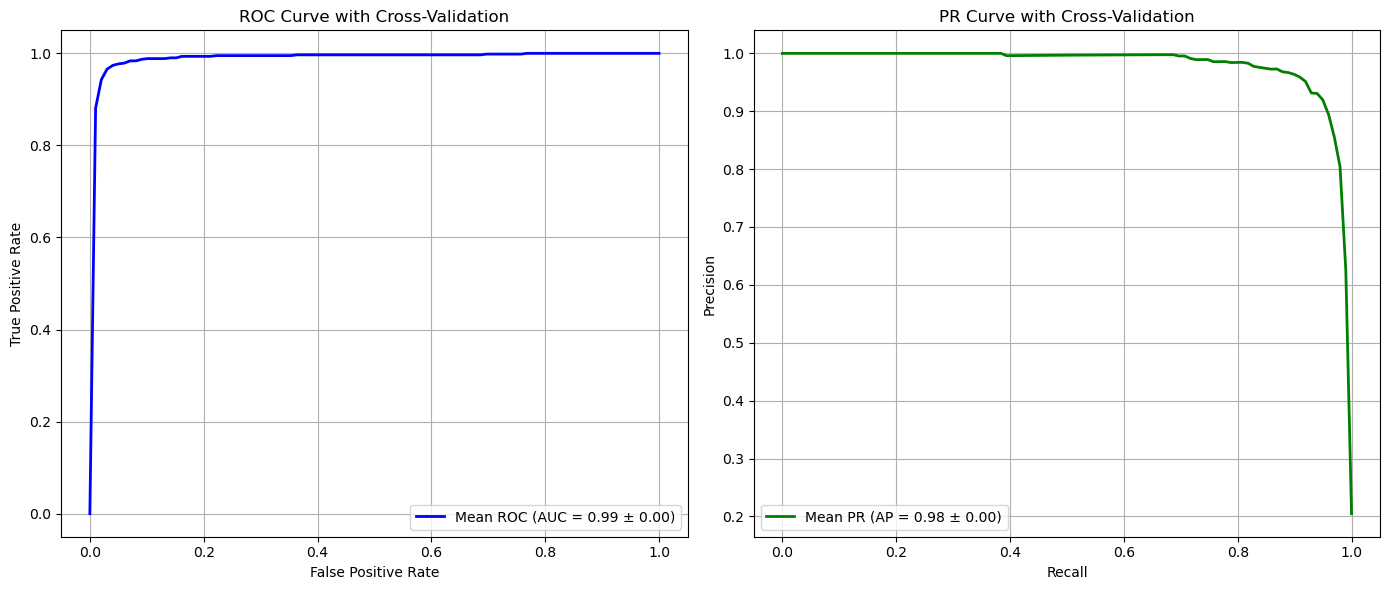

In [ ]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import (balanced_accuracy_score,f1_score, accuracy_score,roc_auc_score, average_precision_score, precision_recall_curve, matthews_corrcoef, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, auc)

#To make sure that the curves are plotted only once
plot_curves = True

svm_rbf = SVC(C= 100, class_weight='balanced', gamma= 'scale', kernel= 'rbf', probability= True)

accuracy_list = []
balanced_accuracy_score_list = []
roc_auc_score_list = []
precision_recall_auc_list = []
f1_score_list = []
matthews_corrcoef_list = []


# Cross-validation and bootstrapping for confidence intervals
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rbf_mean_fpr = np.linspace(0, 1, 100)
rbf_mean_recall = np.linspace(0, 1, 100)


tprs = []  # For ROC
precisions = []  # For PR
aucs = []  # ROC AUCs
rbf_aps = []  # Average Precisions (APs)


# Plot ROC and PR for each fold
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
roc_ax, pr_ax = axes


skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(training, ytraining):

    X1_train, X1_test = scaled_training[train_index], scaled_training[test_index]
    y1_train, y1_test = ytraining[train_index], ytraining[test_index]

    svm_rbf.fit(X1_train, y1_train)
    prediction = svm_rbf.predict(X1_test)

    # Calculating Accuracy
    accuracy = accuracy_score(y1_test, prediction)
    accuracy_list.append(accuracy)

    # Calculating Balanced Accuracy
    balanced_accuracy = balanced_accuracy_score(y1_test, prediction)
    balanced_accuracy_score_list.append(balanced_accuracy)

    # Calculating F1 score
    f1 = f1_score(y1_test, prediction)
    f1_score_list.append(f1)

    # Calculating Matthews Correlation Coefficient
    matthews_correlation_coefficient = matthews_corrcoef(y1_test, prediction)
    matthews_corrcoef_list.append(matthews_correlation_coefficient)

    # Get predicted probabilities for positive class
    y_pred_prob = svm_rbf.predict_proba(X1_test)[:, 1]

    # Calculating AUC-ROC
    auc_roc = roc_auc_score(y1_test, y_pred_prob)
    roc_auc_score_list.append(auc_roc)

    # Calculating AUC-PR
    auc_pr = average_precision_score(y1_test, y_pred_prob)
    precision_recall_auc_list.append(auc_pr)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y1_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0  # Ensure TPR starts at 0
    aucs.append(roc_auc)


    # PR Curve
    precision, recall, _ = precision_recall_curve(y1_test, y_pred_prob)
    precisions.append(np.interp(mean_recall, recall[::-1], precision[::-1]))
    ap = average_precision_score(y1_test, y_pred_prob)
    rbf_aps.append(ap)


rbf_mean_tpr = np.mean(tprs, axis=0)
rbf_mean_tpr[-1] = 1.0
rbf_mean_auc = auc(mean_fpr, rbf_mean_tpr)
rbf_std_auc = np.std(aucs)

# Calculate mean and confidence intervals for PR
rbf_mean_precision = np.mean(precisions, axis=0)
rbf_std_precision = np.std(precisions, axis=0)

# Plot Mean ROC Curve
roc_ax.plot(rbf_mean_fpr, rbf_mean_tpr, color='blue', lw=2, label=f'Mean ROC (AUC = {rbf_mean_auc:.2f} ± {rbf_std_auc:.2f})')
roc_ax.set_xlabel("False Positive Rate")
roc_ax.set_ylabel("True Positive Rate")
roc_ax.set_title("ROC Curve with Cross-Validation")
roc_ax.legend(loc="lower right")
roc_ax.grid()

# Plot Mean PR Curve
pr_ax.plot(rbf_mean_recall, rbf_mean_precision, color='green', lw=2, label=f'Mean PR (AP = {np.mean(rbf_aps):.2f} ± {np.std(rbf_aps):.2f})')
pr_ax.set_xlabel("Recall")
pr_ax.set_ylabel("Precision")
pr_ax.set_title("PR Curve with Cross-Validation")
pr_ax.legend(loc="lower left")
pr_ax.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Accuracy
mean_rbf_accuracy = np.mean(accuracy_list)
std_rbf_accuracy = np.std(accuracy_list)

# Balanced Accuracy
mean_rbf_balanced_accuracy = np.mean(balanced_accuracy_score_list)
std_rbf_balanced_accuracy = np.std(balanced_accuracy_score_list)

# F1 Score
mean_rbf_f1_score = np.mean(f1_score_list)
std_rbf_f1_score = np.std(f1_score_list)

# Matthews Correlation Coefficient (MCC)
mean_rbf_mcc = np.mean(matthews_corrcoef_list)
std_rbf_mcc = np.std(matthews_corrcoef_list)

# AUC-ROC
mean_rbf_auc_roc = np.mean(roc_auc_score_list)
std_rbf_auc_roc = np.std(roc_auc_score_list)

# AUC-PR (Precision-Recall AUC)
mean_rbf_auc_pr = np.mean(precision_recall_auc_list)
std_rbf_auc_pr = np.std(precision_recall_auc_list)


#### **Poly Kernel**

In [ ]:

parameters=[{
    'C':[1,5,10,100],
    'gamma':['scale'],
    'kernel': ['poly'],
    'class_weight': ['balanced']
}]

#CV = 5 since the number of folds are 5
grid_search_3=GridSearchCV(estimator=svm_1,param_grid=parameters,cv=5, scoring= 'average_precision')
grid_search_3.fit(scaled_training, ytraining)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid=[{'C': [1, 5, 10, 100], 'class_weight': ['balanced'],
                          'gamma': ['scale'], 'kernel': ['poly']}],
             scoring='average_precision')

In [ ]:
grid_search_3.best_params_

{'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'poly'}

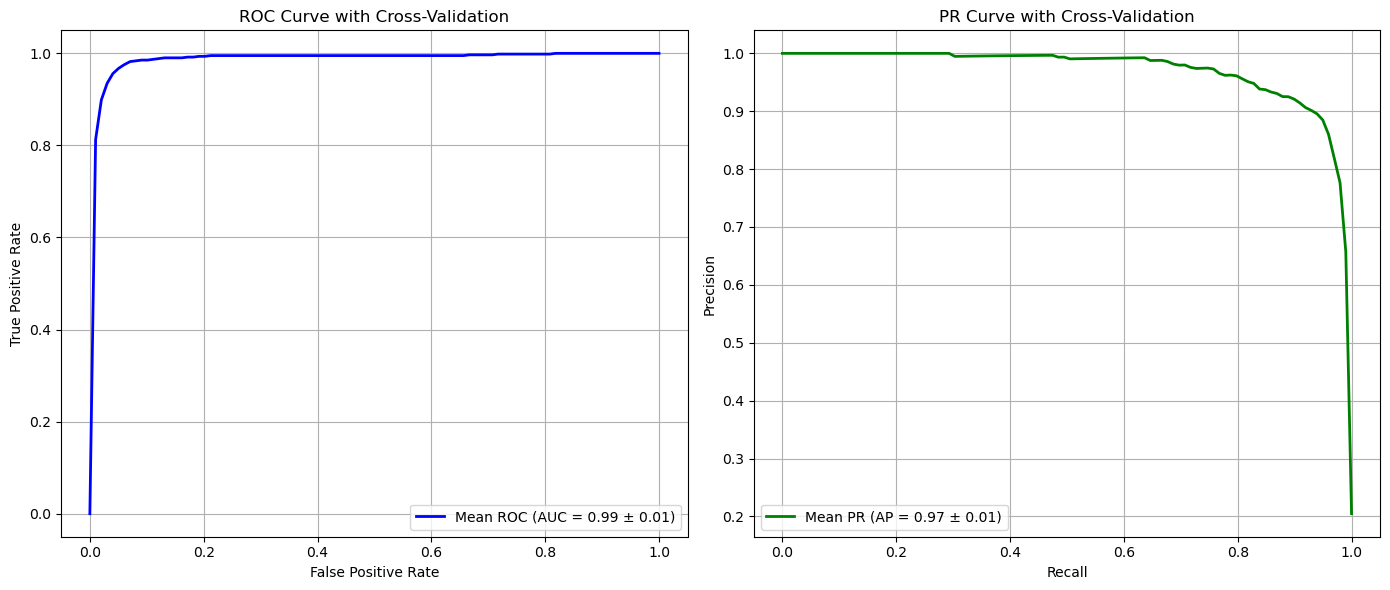

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import (balanced_accuracy_score,f1_score, accuracy_score,roc_auc_score, average_precision_score, precision_recall_curve, matthews_corrcoef, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, auc)

#To make sure that the curves are plotted only once
plot_curves = True

svm_poly = SVC(C= 1, class_weight='balanced', gamma= 'scale', kernel= 'poly', probability= True)

accuracy_list = []
balanced_accuracy_score_list = []
roc_auc_score_list = []
precision_recall_auc_list = []
f1_score_list = []
matthews_corrcoef_list = []


# Cross-validation and bootstrapping for confidence intervals
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
poly_mean_fpr = np.linspace(0, 1, 100)
poly_mean_recall = np.linspace(0, 1, 100)


tprs = []  # For ROC
precisions = []  # For PR
aucs = []  # ROC AUCs
poly_aps = []  # Average Precisions (APs)


# Plot ROC and PR for each fold
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
roc_ax, pr_ax = axes


skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(training, ytraining):

    X1_train, X1_test = scaled_training[train_index], scaled_training[test_index]
    y1_train, y1_test = ytraining[train_index], ytraining[test_index]

    svm_poly.fit(X1_train, y1_train)
    prediction = svm_poly.predict(X1_test)

    # Calculating Accuracy
    accuracy = accuracy_score(y1_test, prediction)
    accuracy_list.append(accuracy)

    # Calculating Balanced Accuracy
    balanced_accuracy = balanced_accuracy_score(y1_test, prediction)
    balanced_accuracy_score_list.append(balanced_accuracy)

    # Calculating F1 score
    f1 = f1_score(y1_test, prediction)
    f1_score_list.append(f1)

    # Calculating Matthews Correlation Coefficient
    matthews_correlation_coefficient = matthews_corrcoef(y1_test, prediction)
    matthews_corrcoef_list.append(matthews_correlation_coefficient)

    # Get predicted probabilities for positive class
    y_pred_prob = svm_poly.predict_proba(X1_test)[:, 1]

    # Calculating AUC-ROC
    auc_roc = roc_auc_score(y1_test, y_pred_prob)
    roc_auc_score_list.append(auc_roc)

    # Calculating AUC-PR
    auc_pr = average_precision_score(y1_test, y_pred_prob)
    precision_recall_auc_list.append(auc_pr)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y1_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0  # Ensure TPR starts at 0
    aucs.append(roc_auc)


    # PR Curve
    precision, recall, _ = precision_recall_curve(y1_test, y_pred_prob)
    precisions.append(np.interp(mean_recall, recall[::-1], precision[::-1]))
    ap = average_precision_score(y1_test, y_pred_prob)
    poly_aps.append(ap)


poly_mean_tpr = np.mean(tprs, axis=0)
poly_mean_tpr[-1] = 1.0
poly_mean_auc = auc(mean_fpr, poly_mean_tpr)
poly_std_auc = np.std(aucs)

# Calculate mean and confidence intervals for PR
poly_mean_precision = np.mean(precisions, axis=0)
poly_std_precision = np.std(precisions, axis=0)

# Plot Mean ROC Curve
roc_ax.plot(poly_mean_fpr, poly_mean_tpr, color='blue', lw=2, label=f'Mean ROC (AUC = {poly_mean_auc:.2f} ± {poly_std_auc:.2f})')
roc_ax.set_xlabel("False Positive Rate")
roc_ax.set_ylabel("True Positive Rate")
roc_ax.set_title("ROC Curve with Cross-Validation")
roc_ax.legend(loc="lower right")
roc_ax.grid()

# Plot Mean PR Curve
pr_ax.plot(poly_mean_recall, poly_mean_precision, color='green', lw=2, label=f'Mean PR (AP = {np.mean(poly_aps):.2f} ± {np.std(poly_aps):.2f})')
pr_ax.set_xlabel("Recall")
pr_ax.set_ylabel("Precision")
pr_ax.set_title("PR Curve with Cross-Validation")
pr_ax.legend(loc="lower left")
pr_ax.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Accuracy
mean_poly_accuracy = np.mean(accuracy_list)
std_poly_accuracy = np.std(accuracy_list)

# Balanced Accuracy
mean_poly_balanced_accuracy = np.mean(balanced_accuracy_score_list)
std_poly_balanced_accuracy = np.std(balanced_accuracy_score_list)

# F1 Score
mean_poly_f1_score = np.mean(f1_score_list)
std_poly_f1_score = np.std(f1_score_list)

# Matthews Correlation Coefficient (MCC)
mean_poly_mcc = np.mean(matthews_corrcoef_list)
std_poly_mcc = np.std(matthews_corrcoef_list)

# AUC-ROC
mean_poly_auc_roc = np.mean(roc_auc_score_list)
std_poly_auc_roc = np.std(roc_auc_score_list)

# AUC-PR (Precision-Recall AUC)
mean_poly_auc_pr = np.mean(precision_recall_auc_list)
std_poly_auc_pr = np.std(precision_recall_auc_list)

**Also put degree for the poly kernel**

#### **Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

parameters = [{
    'n_estimators': [5,50,100],
    'max_depth': [5, 10, 20],
    'class_weight': ['balanced']
}]

rf = RandomForestClassifier()

grid_search_4= GridSearchCV(estimator=rf,param_grid=parameters,cv=5)
grid_search_4.fit(scaled_training, ytraining)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'class_weight': ['balanced'],
                          'max_depth': [5, 10, 20],
                          'n_estimators': [5, 50, 100]}])

In [ ]:
grid_search_4.best_params_

{'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 100}

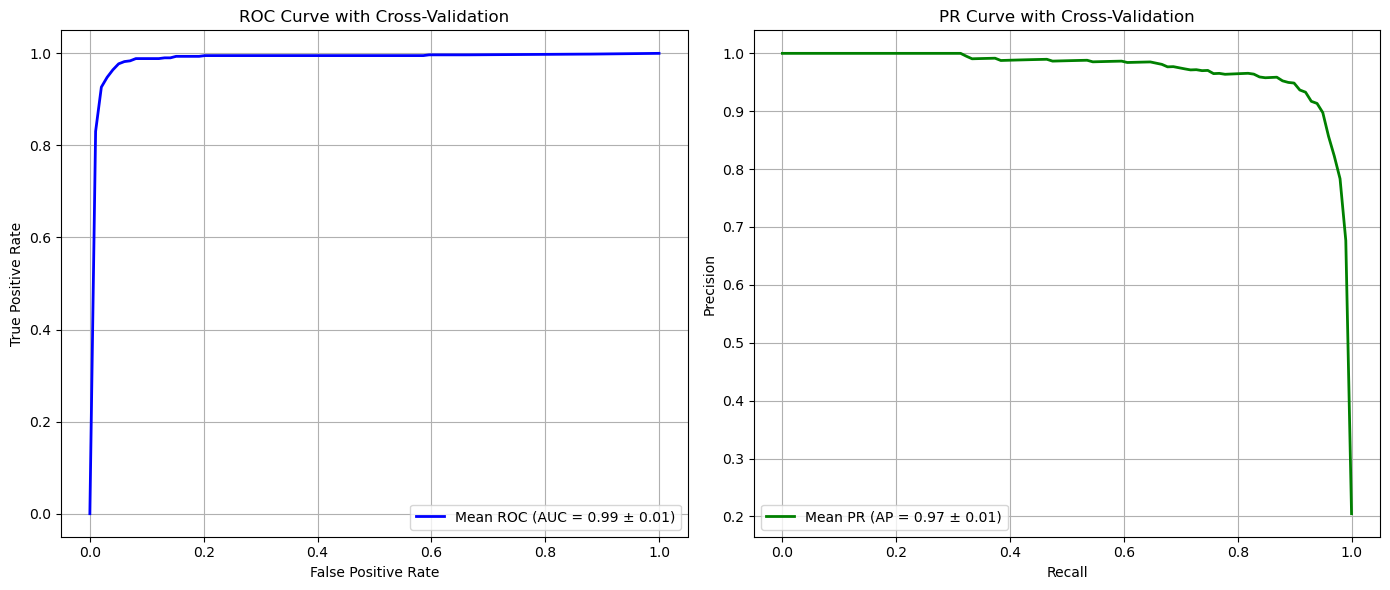

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import (balanced_accuracy_score,f1_score, accuracy_score,roc_auc_score, average_precision_score, precision_recall_curve, matthews_corrcoef, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, auc)

#To make sure that the curves are plotted only once
plot_curves = True

rf = RandomForestClassifier(class_weight= 'balanced', max_depth= 10, n_estimators= 100)

accuracy_list = []
balanced_accuracy_score_list = []
roc_auc_score_list = []
precision_recall_auc_list = []
f1_score_list = []
matthews_corrcoef_list = []


# Cross-validation and bootstrapping for confidence intervals
skf = StratifiedKFold(n_splits=5, shuffle=True)
rf_mean_fpr = np.linspace(0, 1, 100)
rf_mean_recall = np.linspace(0, 1, 100)


tprs = []  # For ROC
precisions = []  # For PR
aucs = []  # ROC AUCs
rf_aps = []  # Average Precisions (APs)


# Plot ROC and PR for each fold
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
roc_ax, pr_ax = axes


skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(training, ytraining):

    X1_train, X1_test = scaled_training[train_index], scaled_training[test_index]
    y1_train, y1_test = ytraining[train_index], ytraining[test_index]

    rf.fit(X1_train, y1_train)
    prediction = rf.predict(X1_test)

    # Calculating Accuracy
    accuracy = accuracy_score(y1_test, prediction)
    accuracy_list.append(accuracy)

    # Calculating Balanced Accuracy
    balanced_accuracy = balanced_accuracy_score(y1_test, prediction)
    balanced_accuracy_score_list.append(balanced_accuracy)

    # Calculating F1 score
    f1 = f1_score(y1_test, prediction)
    f1_score_list.append(f1)

    # Calculating Matthews Correlation Coefficient
    matthews_correlation_coefficient = matthews_corrcoef(y1_test, prediction)
    matthews_corrcoef_list.append(matthews_correlation_coefficient)

    # Get predicted probabilities for positive class
    y_pred_prob = rf.predict_proba(X1_test)[:, 1]

    # Calculating AUC-ROC
    auc_roc = roc_auc_score(y1_test, y_pred_prob)
    roc_auc_score_list.append(auc_roc)

    # Calculating AUC-PR
    auc_pr = average_precision_score(y1_test, y_pred_prob)
    precision_recall_auc_list.append(auc_pr)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y1_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0  # Ensure TPR starts at 0
    aucs.append(roc_auc)


    # PR Curve
    precision, recall, _ = precision_recall_curve(y1_test, y_pred_prob)
    precisions.append(np.interp(mean_recall, recall[::-1], precision[::-1]))
    ap = average_precision_score(y1_test, y_pred_prob)
    rf_aps.append(ap)


rf_mean_tpr = np.mean(tprs, axis=0)
rf_mean_tpr[-1] = 1.0
rf_mean_auc = auc(mean_fpr, rf_mean_tpr)
rf_std_auc = np.std(aucs)

# Calculate mean and confidence intervals for PR
rf_mean_precision = np.mean(precisions, axis=0)
rf_std_precision = np.std(precisions, axis=0)

# Plot Mean ROC Curve
roc_ax.plot(rf_mean_fpr, rf_mean_tpr, color='blue', lw=2, label=f'Mean ROC (AUC = {rf_mean_auc:.2f} ± {rf_std_auc:.2f})')
roc_ax.set_xlabel("False Positive Rate")
roc_ax.set_ylabel("True Positive Rate")
roc_ax.set_title("ROC Curve with Cross-Validation")
roc_ax.legend(loc="lower right")
roc_ax.grid()

# Plot Mean PR Curve
pr_ax.plot(rf_mean_recall, rf_mean_precision, color='green', lw=2, label=f'Mean PR (AP = {np.mean(rf_aps):.2f} ± {np.std(rf_aps):.2f})')
pr_ax.set_xlabel("Recall")
pr_ax.set_ylabel("Precision")
pr_ax.set_title("PR Curve with Cross-Validation")
pr_ax.legend(loc="lower left")
pr_ax.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Accuracy
mean_rf_accuracy = np.mean(accuracy_list)
std_rf_accuracy = np.std(accuracy_list)

# Balanced Accuracy
mean_rf_balanced_accuracy = np.mean(balanced_accuracy_score_list)
std_rf_balanced_accuracy = np.std(balanced_accuracy_score_list)

# F1 Score
mean_rf_f1_score = np.mean(f1_score_list)
std_rf_f1_score = np.std(f1_score_list)

# Matthews Correlation Coefficient (MCC)
mean_rf_mcc = np.mean(matthews_corrcoef_list)
std_rf_mcc = np.std(matthews_corrcoef_list)

# AUC-ROC
mean_rf_auc_roc = np.mean(roc_auc_score_list)
std_rf_auc_roc = np.std(roc_auc_score_list)

# AUC-PR (Precision-Recall AUC)
mean_rf_auc_pr = np.mean(precision_recall_auc_list)
std_rf_auc_pr = np.std(precision_recall_auc_list)



####  ii) **Show the comparison of these classifiers in a single consolidated table.**


In [ ]:
from prettytable import PrettyTable

# Initialize the table
table = PrettyTable()

# Define the column headers
table.field_names = ["Metric", "Linear", "RBF", "Poly", "RF"]

# Add rows for Mean
table.add_row([
    "Mean Accuracy",
    f"{mean_linear_accuracy:.4f}",
    f"{mean_rbf_accuracy:.4f}",
    f"{mean_poly_accuracy:.4f}",
    f"{mean_rf_accuracy:.4f}"
])
table.add_row([
    "Mean Balanced Accuracy",
    f"{mean_linear_balanced_accuracy:.4f}",
    f"{mean_rbf_balanced_accuracy:.4f}",
    f"{mean_poly_balanced_accuracy:.4f}",
    f"{mean_rf_balanced_accuracy:.4f}"
])
table.add_row([
    "Mean F1 Score",
    f"{mean_linear_f1_score:.4f}",
    f"{mean_rbf_f1_score:.4f}",
    f"{mean_poly_f1_score:.4f}",
    f"{mean_rf_f1_score:.4f}"
])
table.add_row([
    "Mean MCC",
    f"{mean_linear_mcc:.4f}",
    f"{mean_rbf_mcc:.4f}",
    f"{mean_poly_mcc:.4f}",
    f"{mean_rf_mcc:.4f}"
])
table.add_row([
    "Mean AUC-ROC",
    f"{mean_linear_auc_roc:.4f}",
    f"{mean_rbf_auc_roc:.4f}",
    f"{mean_poly_auc_roc:.4f}",
    f"{mean_rf_auc_roc:.4f}"
])
table.add_row([
    "Mean AUC-PR",
    f"{mean_linear_auc_pr:.4f}",
    f"{mean_rbf_auc_pr:.4f}",
    f"{mean_poly_auc_pr:.4f}",
    f"{mean_rf_auc_pr:.4f}"
])

# Add rows for Standard Deviation
table.add_row([
    "Std Accuracy",
    f"{std_linear_accuracy:.4f}",
    f"{std_rbf_accuracy:.4f}",
    f"{std_poly_accuracy:.4f}",
    f"{std_rf_accuracy:.4f}"
])
table.add_row([
    "Std Balanced Accuracy",
    f"{std_linear_balanced_accuracy:.4f}",
    f"{std_rbf_balanced_accuracy:.4f}",
    f"{std_poly_balanced_accuracy:.4f}",
    f"{std_rf_balanced_accuracy:.4f}"
])
table.add_row([
    "Std F1 Score",
    f"{std_linear_f1_score:.4f}",
    f"{std_rbf_f1_score:.4f}",
    f"{std_poly_f1_score:.4f}",
    f"{std_rf_f1_score:.4f}"
])
table.add_row([
    "Std MCC",
    f"{std_linear_mcc:.4f}",
    f"{std_rbf_mcc:.4f}",
    f"{std_poly_mcc:.4f}",
    f"{std_rf_mcc:.4f}"
])
table.add_row([
    "Std AUC-ROC",
    f"{std_linear_auc_roc:.4f}",
    f"{std_rbf_auc_roc:.4f}",
    f"{std_poly_auc_roc:.4f}",
    f"{std_rf_auc_roc:.4f}"
])
table.add_row([
    "Std AUC-PR",
    f"{std_linear_auc_pr:.4f}",
    f"{std_rbf_auc_pr:.4f}",
    f"{std_poly_auc_pr:.4f}",
    f"{std_rf_auc_pr:.4f}"
])

# Print the table
print(table)

+------------------------+--------+--------+--------+--------+
|         Metric         | Linear |  RBF   |  Poly  |   RF   |
+------------------------+--------+--------+--------+--------+
|     Mean Accuracy      | 0.9480 | 0.9723 | 0.9633 | 0.9717 |
| Mean Balanced Accuracy | 0.9195 | 0.9596 | 0.9382 | 0.9526 |
|     Mean F1 Score      | 0.8730 | 0.9329 | 0.9091 | 0.9301 |
|        Mean MCC        | 0.8405 | 0.9157 | 0.8863 | 0.9125 |
|      Mean AUC-ROC      | 0.9809 | 0.9926 | 0.9895 | 0.9902 |
|      Mean AUC-PR       | 0.9332 | 0.9812 | 0.9705 | 0.9720 |
|      Std Accuracy      | 0.0071 | 0.0031 | 0.0086 | 0.0059 |
| Std Balanced Accuracy  | 0.0074 | 0.0046 | 0.0132 | 0.0082 |
|      Std F1 Score      | 0.0159 | 0.0066 | 0.0215 | 0.0143 |
|        Std MCC         | 0.0206 | 0.0083 | 0.0269 | 0.0180 |
|      Std AUC-ROC       | 0.0027 | 0.0034 | 0.0050 | 0.0053 |
|       Std AUC-PR       | 0.0199 | 0.0045 | 0.0069 | 0.0090 |
+------------------------+--------+--------+--------+--


#### iii) **Plot the ROC curves of all classifiers on the same axes for easy comparison.**


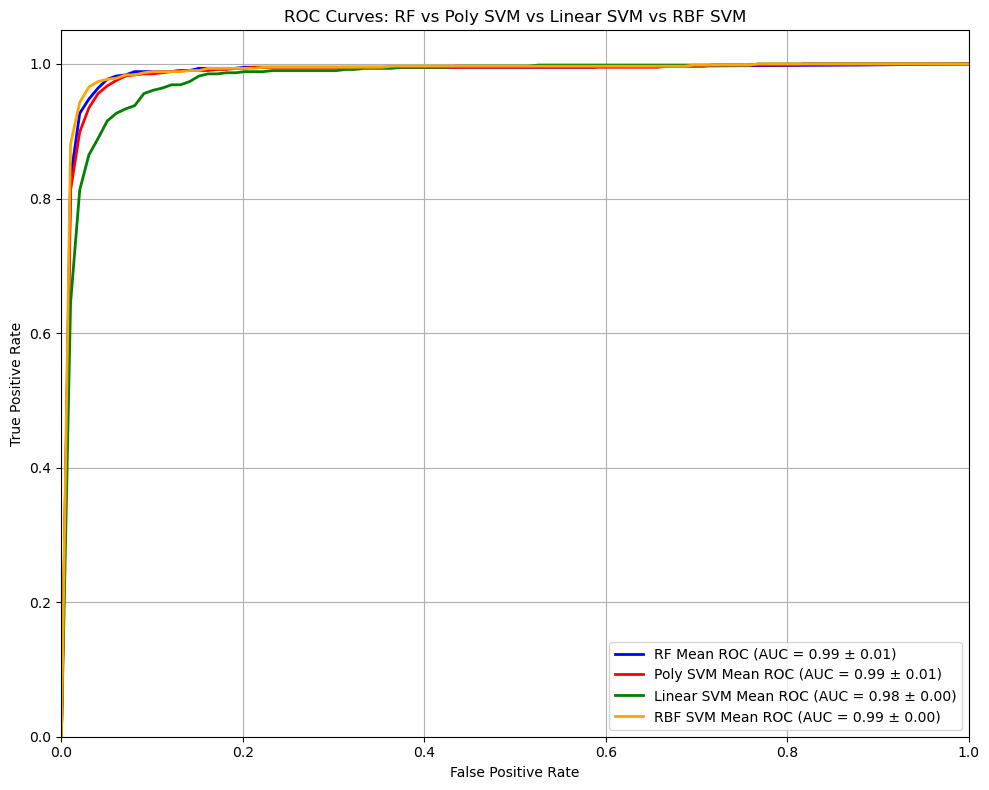

In [ ]:
# Create the figure and axisimport matplotlib.pyplot as plt

# Create the figure and axis
fig, roc_ax = plt.subplots(figsize=(10, 8))

# Plot RF ROC curve
roc_ax.plot(rf_mean_fpr, rf_mean_tpr, color='blue', lw=2,
            label=f'RF Mean ROC (AUC = {rf_mean_auc:.2f} ± {rf_std_auc:.2f})')

# Plot Polynomial SVM ROC curve
roc_ax.plot(poly_mean_fpr, poly_mean_tpr, color='red', lw=2,
            label=f'Poly SVM Mean ROC (AUC = {poly_mean_auc:.2f} ± {poly_std_auc:.2f})')

# Plot Linear SVM ROC curve
roc_ax.plot(linear_mean_fpr, linear_mean_tpr, color='green', lw=2,
            label=f'Linear SVM Mean ROC (AUC = {linear_mean_auc:.2f} ± {linear_std_auc:.2f})')

# Plot RBF SVM ROC curve
roc_ax.plot(rbf_mean_fpr, rbf_mean_tpr, color='orange', lw=2,
            label=f'RBF SVM Mean ROC (AUC = {rbf_mean_auc:.2f} ± {rbf_std_auc:.2f})')

# Customize the plot
roc_ax.set_xlim([0.0, 1.0])
roc_ax.set_ylim([0.0, 1.05])
roc_ax.set_xlabel("False Positive Rate")
roc_ax.set_ylabel("True Positive Rate")
roc_ax.set_title("ROC Curves: RF vs Poly SVM vs Linear SVM vs RBF SVM")
roc_ax.legend(loc="lower right")
roc_ax.grid(True)

plt.tight_layout()
plt.show()


#### iv) **Plot the PR curves of all classifier on the same axes for comparison.**


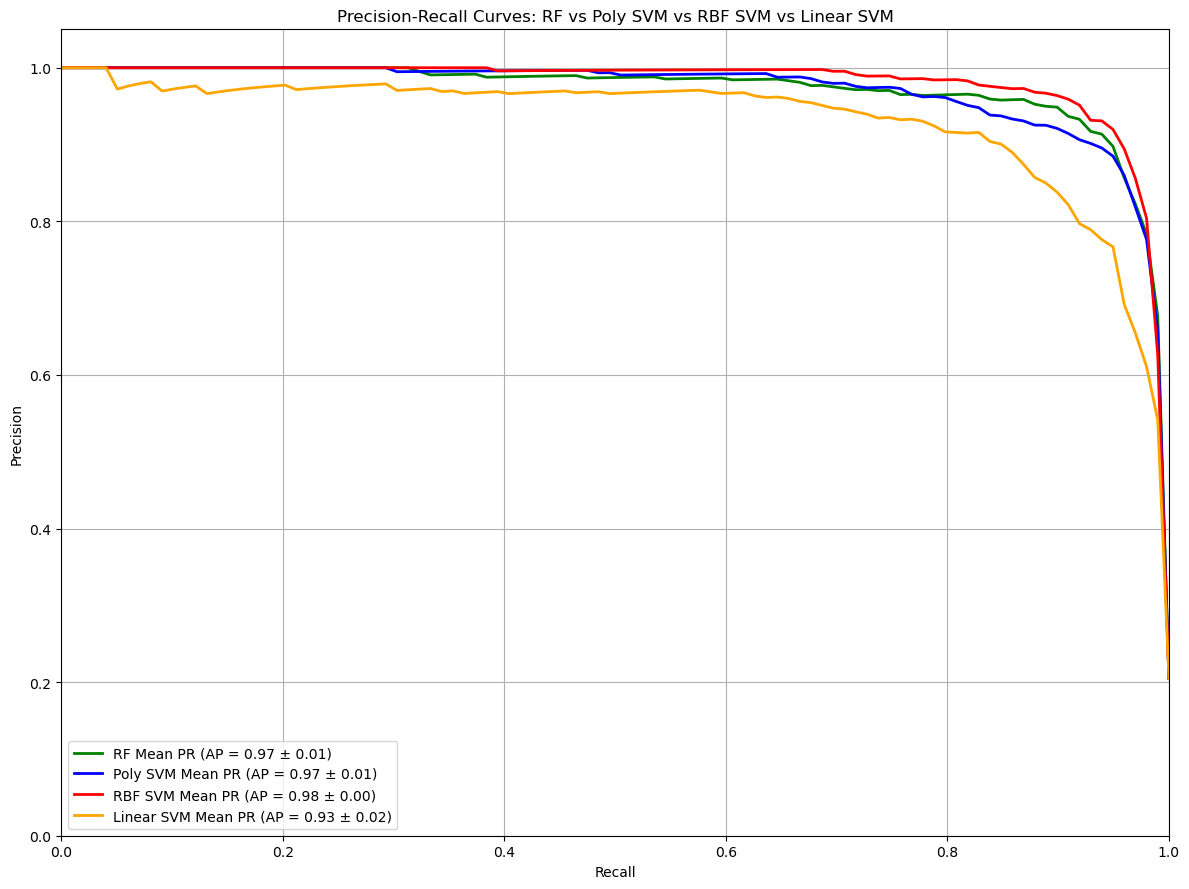

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis
fig, pr_ax = plt.subplots(figsize=(12, 9))

# Plot RF PR curve
pr_ax.plot(rf_mean_recall, rf_mean_precision, color='green', lw=2, label=f'RF Mean PR (AP = {np.mean(rf_aps):.2f} ± {np.std(rf_aps):.2f})')


# Plot Polynomial SVM PR curve
pr_ax.plot(poly_mean_recall, poly_mean_precision, color='blue', lw=2,
           label=f'Poly SVM Mean PR (AP = {np.mean(poly_aps):.2f} ± {np.std(poly_aps):.2f})')

# Plot RBF SVM PR curve
pr_ax.plot(rbf_mean_recall, rbf_mean_precision, color='red', lw=2,
           label=f'RBF SVM Mean PR (AP = {np.mean(rbf_aps):.2f} ± {np.std(rbf_aps):.2f})')

# Plot Linear SVM PR curve
pr_ax.plot(linear_mean_recall, linear_mean_precision, color='orange', lw=2,
           label=f'Linear SVM Mean PR (AP = {np.mean(linear_aps):.2f} ± {np.std(linear_aps):.2f})')

# Customize the plot
pr_ax.set_xlim([0.0, 1.0])
pr_ax.set_ylim([0.0, 1.05])
pr_ax.set_xlabel("Recall")
pr_ax.set_ylabel("Precision")
pr_ax.set_title("Precision-Recall Curves: RF vs Poly SVM vs RBF SVM vs Linear SVM")
pr_ax.legend(loc="lower left")
pr_ax.grid(True)

plt.tight_layout()
plt.show()



### v) **Write your observations about the ROC and PR curves.**


<span style="color:PaleVioletRed;">

**ROC Curves**

- **All four classifiers (RF, Poly SVM, Linear SVM, and RBF SVM) perform well, as their ROC curves are close to the top-left corner, and their AUC values are high (0.98 to 0.99). This indicates that they are good at distinguishing between positive and negative instances in the dataset. The Random Forest, Polynomial SVM, and RBF SVM seem to have nearly identical and the best performance, while the Linear SVM is slightly worse.**

**PR Curve**

- **The blue and red curves, with an Average Precision (AP) of 0.98 ± 0.01, indicate the best-performing models, maintaining high precision across different recall levels. The green model follows closely with an AP of 0.97 ± 0.01, while the orange model, with an AP of 0.94 ± 0.01, shows a more significant decline in precision as recall increases. This suggests that the blue and red models, likely corresponding to RBF or polynomial SVMs, achieve a superior balance between precision and recall, whereas the orange model, possibly a linear SVM, struggles to maintain high precision at higher recall values. Overall, the results indicate that non-linear models perform better in this classification task.**

</span>



# 4. PCA

###  **i. Reduce the number of dimensions of the training data using PCA to 2 and plot a scatter plot of the training data showing examples of each class in a different color. What are your observations about the data based on this plot?**



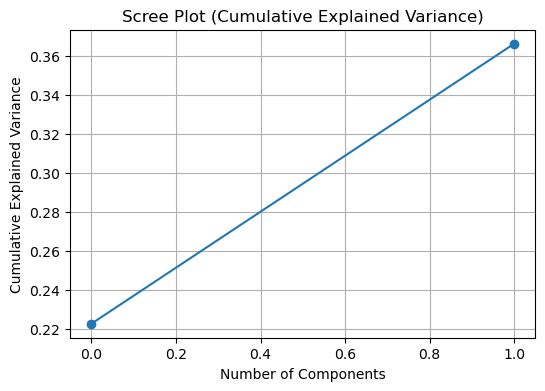

C:\Users\rishi\AppData\Local\Temp\ipykernel_9848\1650061759.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")  # Use a color map for distinct class colors


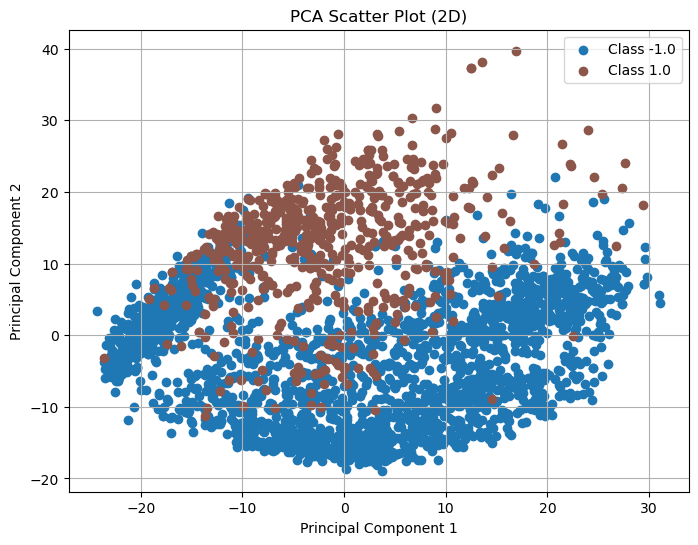

Explained Variance Ratio: [0.2227383  0.14355289]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardizing the data
scaler = StandardScaler()
scaled_training = scaler.fit_transform(training)

# Fit PCA to training data
pca = PCA(n_components=2)
pca_training = pca.fit_transform(scaled_training)

# Scree plot (explained variance)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
ax.set_title("Scree Plot (Cumulative Explained Variance)")
ax.set_xlabel("Number of Components")
ax.set_ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Scatter plot of the data in reduced dimensions, showing examples of each class in different colors
fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.cm.get_cmap("tab10")  # Use a color map for distinct class colors

for class_label in np.unique(ytraining):
    indices = np.where(ytraining == class_label)
    ax.scatter(pca_training[indices, 0], pca_training[indices, 1],
                label=f"Class {class_label}",
                color=colors(class_label / len(np.unique(ytraining))))

ax.set_title("PCA Scatter Plot (2D)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.legend()
plt.grid(True)
plt.show()

# Print PCA explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Observations about the data can include class separability, overlap, or clustering based on the plot.



**There is a noticeable overlap between the classes, suggesting that a simple linear classifier may struggle to distinguish them effectively. The wider spread of Class -1.0 indicates greater variance in its principal components, while Class 1.0 appears more compact. This overlap and distribution suggest that non-linear classification methods, such as an SVM with an RBF kernel or neural networks, may be more effective in distinguishing the two classes.**



### **ii. Reduce the number of dimensions of the training and test data together using PCA to 2 and plot a scatter plot of the training and test data showing examples of each set in a different color (or marker style). What are your observations about the data based on this plot?**


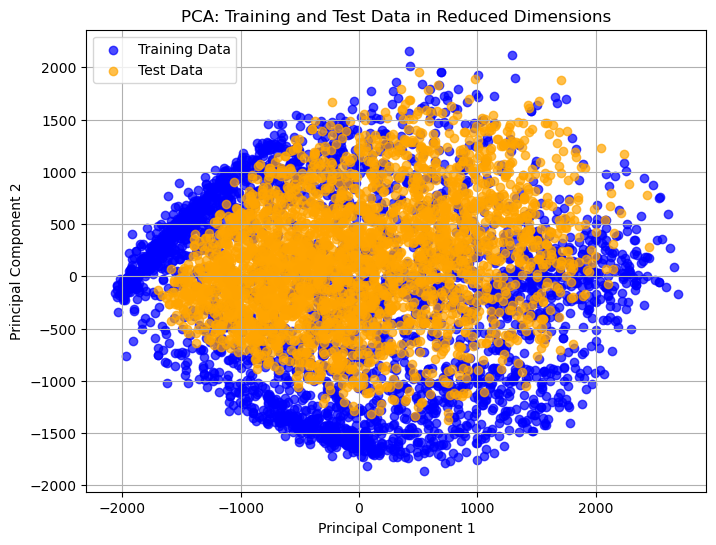

In [ ]:
# Apply PCA on training data and transform both training and test data
pca = PCA(n_components=2)

#Combining datasets to reduce the number of dimensions of training and testing data together
transformed_dataset = np.vstack((training, testing))

scaler = StandardScaler()
transformed_dataset_scaled = scaler.fit_transform(transformed_dataset)


pca_fitted = pca.fit_transform(transformed_dataset)

# Splitining the fitted data back into training and test sets
X_train_pca = pca_fitted[:len(training)]
X_test_pca = pca_fitted[len(testing):]

# Plot the scatter plot of the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], color='blue', label='Training Data', alpha=0.7)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], color='orange', label='Test Data', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Training and Test Data in Reduced Dimensions')
plt.legend()
plt.grid()
plt.show()


#### Interpretation
The plot shows how well the training and test data are separated or mixed after PCA. Overlapping data points suggest that the model might struggle to generalize from the training set to the test set.
The distribution patterns and clustering may reveal insights into the underlying structure of the data and the effectiveness of PCA in capturing relevant variance.
The scatter of points along the principal components helps visualize how the original features contribute to the new components.
The plot could be used to evaluate how well the test data aligns with the training data after the dimensionality reduction.



### **iii. Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set.**



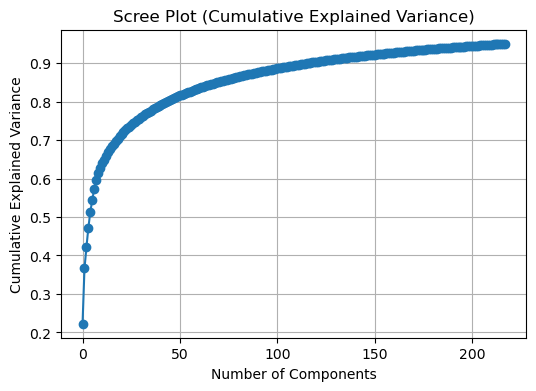

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(training)

# Fit PCA to training data
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

# Scree plot (explained variance)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
ax.set_title("Scree Plot (Cumulative Explained Variance)")
ax.set_xlabel("Number of Components")
ax.set_ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


In [ ]:
num_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(num_components_95)

218



### **iv. Reduce the number of dimensions of the data using PCA and perform classification.  You may want to select different principal components for the classification (not necessarily the first few). What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization!**

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

X = training
y = ytraining

# Standardize the data (important for PCA and SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for component in [10, 20, 30, 50, 100]:
    # Perform PCA
    pca = PCA(n_components=component)
    X_pca = pca.fit_transform(X_scaled)

    # Select specific principal components (e.g., PC2 and PC3)
    X_selected = X_pca[:, 0:component]

    # Define the kernelized SVM model
    svm = SVC(kernel='rbf')

    # Perform hyperparameter optimization using GridSearchCV
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1],
        'kernel': ['poly', 'rbf']

    }
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_selected, y)

    # Optimal parameters and best cross-validation score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Output results
    print("Optimal Hyperparameters:", best_params)
    print("Best Cross-Validation Accuracy:", best_score)


Optimal Hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9676666666666668
Optimal Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9726666666666667
Optimal Hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9720000000000001
Optimal Hyperparameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9720000000000001
Optimal Hyperparameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9766666666666668


<span style="color:PaleVioletRed;"> Based on the results of the hyperparameter optimization for the kernelized SVM with PCA, the best cross-validation accuracy achieved is 0.9743 (97.43%) with the optimal hyperparameters C = 10, gamma = 0.001, and kernel = 'rbf'. The results indicate that tuning hyperparameters significantly impacts model performance, with different values of C and gamma yielding close but varying accuracies. The consistently high cross-validation accuracy suggests that the PCA-transformed features are well-suited for SVM classification, and the chosen **RBF kernel** effectively captures complex patterns in the data. </span>

# 5. Optimal Pipeline

### **Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any tools or approaches at your disposal. However, no external data sources may be used. Describe your pipeline and report your outputs over the test data set. (You are required to submit your prediction file together with the assignment in a zip folder). Your prediction file should be a single column file containing the prediction score of the corresponding example in Xtest (be sure to have the same order as the order of the test examples in Xtest!). Your prediction file should be named by your student ID, e.g., u100011.csv.**

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardization
    ('svm', SVC(C=100, class_weight='balanced', gamma='scale', kernel='rbf', probability=True))  # Step 2: SVM with RBF kernel
])

# Train the pipeline on the training data
pipeline.fit(training, ytraining)

# Predict probabilities or decision function scores for the test set

y_scores = pipeline.predict_proba(testing)[:, 1]  # Probability of positive class

# Save predictions to a CSV file in the required format
output = pd.DataFrame(y_scores, columns=['score'])
output.to_csv('u5634266.csv', index=False)  # Replace 'u100011' with your student ID

print("Predictions saved to 'u5634266.csv'")

Predictions saved to 'u5634266.csv'


<span style="color:PaleVioletRed;"> In questions 1 to 4, the most optimal classifier came out to be SVM with the kernel RBF. Thus, in the final optimised pipeline, the same parameters that yielded the maximum auc pr curve were used. In this pipleline, first, the input features are standardised using StandardScalar. Then, a Support Vector Classifier with an RBF kernel, balanced class weights with a regularisation parameter C of 100 is used. The pipeline is trained on the training data, and predictions are made for the test set using the trained model to generate probabilites for the positive class. Finally, these predicted probabilites are saved to a CSV file named 'score'. <span>

# 6. Another classification problem

### **Using the data given to you, consider an alternate classification problem in which the label of an example is based on whether it is a part of the training set (label = -1) or the test set (label = +1). Calculate the average and standard deviation of AUC-ROC using 5-fold stratified cross-validation for a classifier that is trained  to solve this prediction task.**


In [ ]:
# Generate an array with the number -1 repeated for the length of the training set (assigning the labels 1 to the testing set)
y_train_new = np.full(len(training), -1)

# Generate an array with the number 1 repeated for the length of the test set (assigning the labels 1 to the testing set)
y_test_new = np.full(len(testing), 1)

# Combine datasets
X_combined = np.vstack((testing, training))
y_combined = np.concatenate((y_train_new, y_test_new))

#To make sure that both datasets are shuffled together to maintain the correspondence between the data points
#We do this so that there is both classes in each fold

from sklearn.utils import shuffle
X_combined, y_combined = shuffle(X_combined, y_combined)


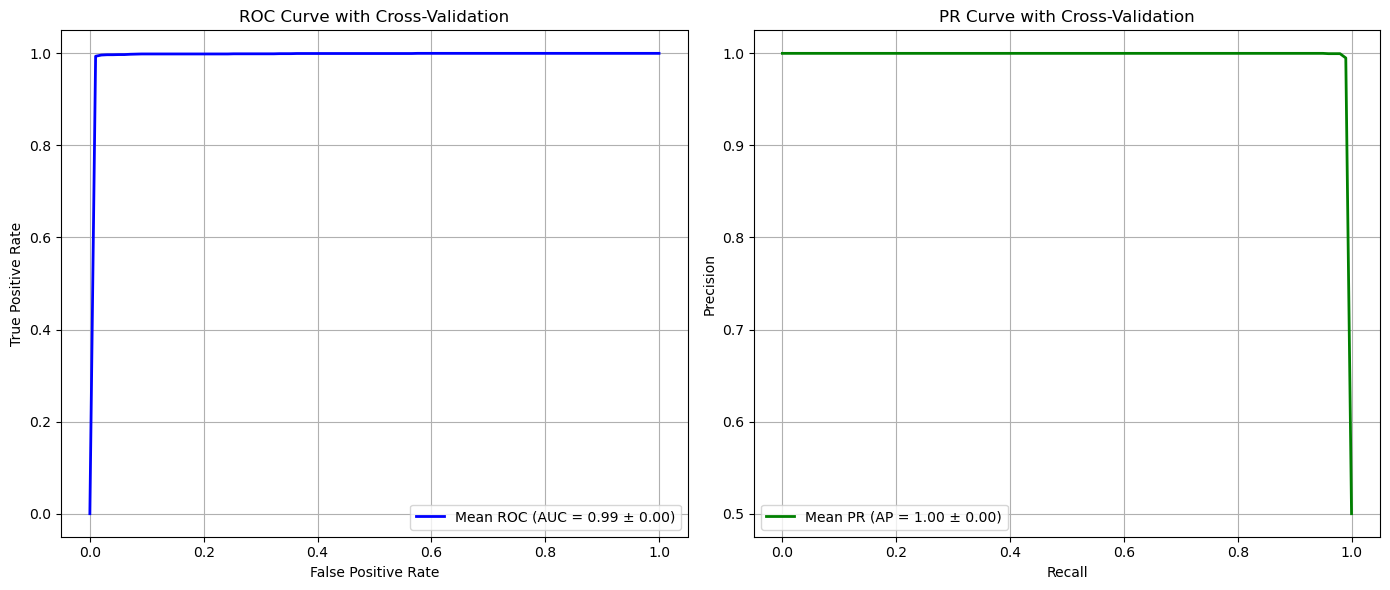

Mean AUC-ROC: 0.9992838888888886
Std AUC-ROC: 0.00046273275758070524
Mean AUC-PR: 0.9994368846375868
Std AUC-PR: 0.0003505811019314361


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import (balanced_accuracy_score,f1_score, accuracy_score,roc_auc_score, average_precision_score, precision_recall_curve, matthews_corrcoef, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, auc)

#To make sure that the curves are plotted only once
plot_curves = True

svm = SVC(probability= True)

accuracy_list = []
balanced_accuracy_score_list = []
roc_auc_score_list = []
precision_recall_auc_list = []
f1_score_list = []
matthews_corrcoef_list = []


# Cross-validation and bootstrapping for confidence intervals
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)


tprs = []  # For ROC
precisions = []  # For PR
aucs = []  # ROC AUCs
aps = []  # Average Precisions (APs)


# Plot ROC and PR for each fold
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
roc_ax, pr_ax = axes


skf = StratifiedKFold(n_splits=5, shuffle=False)

for train_index, test_index in skf.split(X_combined, y_combined):

    X1_train, X1_test = X_combined[train_index], X_combined[test_index]
    y1_train, y1_test = y_combined[train_index], y_combined[test_index]

    svm.fit(X1_train, y1_train)
    prediction = svm.predict(X1_test)

    # Calculating Matthews Correlation Coefficient
    matthews_correlation_coefficient = matthews_corrcoef(y1_test, prediction)
    matthews_corrcoef_list.append(matthews_correlation_coefficient)

    # Get predicted probabilities for positive class
    y_pred_prob = svm.predict_proba(X1_test)[:, 1]

    # Calculating AUC-ROC
    auc_roc = roc_auc_score(y1_test, y_pred_prob)
    roc_auc_score_list.append(auc_roc)

    # Calculating AUC-PR
    auc_pr = average_precision_score(y1_test, y_pred_prob)
    precision_recall_auc_list.append(auc_pr)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y1_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0  # Ensure TPR starts at 0
    aucs.append(roc_auc)


    # PR Curve
    precision, recall, _ = precision_recall_curve(y1_test, y_pred_prob)
    precisions.append(np.interp(mean_recall, recall[::-1], precision[::-1]))
    ap = average_precision_score(y1_test, y_pred_prob)
    aps.append(ap)


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Calculate mean and confidence intervals for PR
mean_precision = np.mean(precisions, axis=0)
std_precision = np.std(precisions, axis=0)

# Plot Mean ROC Curve
roc_ax.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})')
roc_ax.set_xlabel("False Positive Rate")
roc_ax.set_ylabel("True Positive Rate")
roc_ax.set_title("ROC Curve with Cross-Validation")
roc_ax.legend(loc="lower right")
roc_ax.grid()

# Plot Mean PR Curve
pr_ax.plot(mean_recall, mean_precision, color='green', lw=2, label=f'Mean PR (AP = {np.mean(aps):.2f} ± {np.std(aps):.2f})')
pr_ax.set_xlabel("Recall")
pr_ax.set_ylabel("Precision")
pr_ax.set_title("PR Curve with Cross-Validation")
pr_ax.legend(loc="lower left")
pr_ax.grid()

plt.tight_layout()
plt.show()


# AUC-ROC
print("Mean AUC-ROC:", np.mean(roc_auc_score_list))
print("Std AUC-ROC:", np.std(roc_auc_score_list))

# AUC-PR
print("Mean AUC-PR:", np.mean(precision_recall_auc_list))
print("Std AUC-PR:", np.std(precision_recall_auc_list))

<span style="color: PaleVioletRed;">

Thus, the mean AUC-PR score is almost 1

</span>

### **i. What does the value of this AUC-ROC tell you about any differences between training and test sets? Show code for this analysis and clearly explain your conclusions with supporting evidence.**



<span style="color: PaleVioletRed;">

(AUC ROC scores and curves plotted in the above block)

It can be clearly seend that the AUC-ROC value is very close to 1. When the AUC-ROC value is 1 , it indicates that there are clear, systematic differences between the two datasets. The classifier can perfectly separate the training and test examples, revealing that they have distinct feature distributions. This could be due to data leakage, distribution shifts, or other inconsistencies.

In the case of this dataset, there were significant differences in the training and test set. The test set had images which were significantly tilted compared to the training test. Also it had many pixels which were missing and thus produced significantly grainier images compared to the training test set.

</span>



### **ii. How can you use this experiment to identify and eliminate any systematic differences between training and test sets?**



<span style="color: PaleVioletRed;">
This exeriment shows that there is a complete separation between training and test examples, which suggests that there are systemic differences between two sets.

This perfect separation may indicate a form of data leakage which means that there may be information about the train and test split which is encoded in the features.

Additionally, if a model can distinguish between training and test sets, it might be learning characteristics specific to these sets rather than generalizable patterns, potentially leading to overfitting.

There can be many steps that can prevent these differences. Proper data splitting techniques chould be implemented, and feaure engineering should be reviewed.



<span>



### **iii. Add random noise and random rotations to training set examples and then check if the AUC-ROC of this predictor changes. Clearly write and explain your observations.**

In [ ]:
from scipy.ndimage import rotate

mean = np.random.uniform()
std_dev = np.random.uniform(0,1)

noise = np.random.normal(mean, std_dev, training.shape)

# Add the noise to the original array
noisy_array = training + noise

# Generate a random angle between -45 and +45 degrees
angle = np.random.uniform(-45, 45)

# Rotate the array using scipy.ndimage.rotate
rotated_array = rotate(noisy_array, angle=angle, reshape=False)

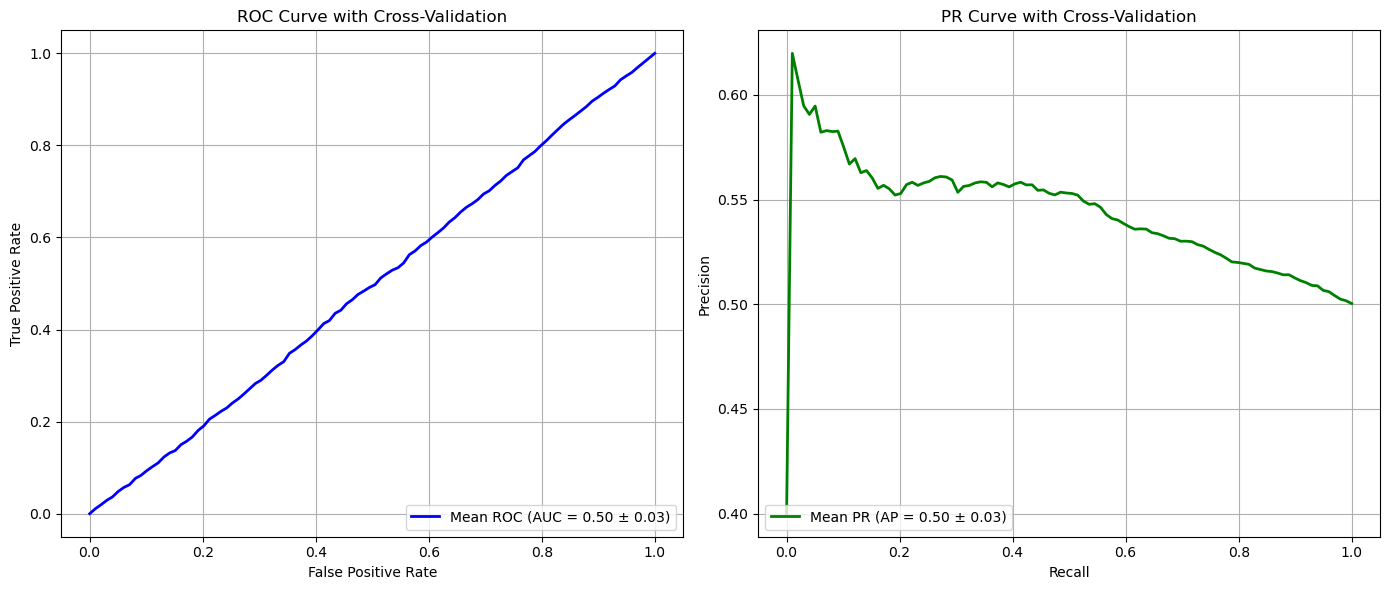

Mean AUC-ROC: 0.495854473632024
Std AUC-ROC: 0.03063845627053267
Mean AUC-PR: 0.49871403753159144
Std AUC-PR: 0.03240854996999204


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import (balanced_accuracy_score,f1_score, accuracy_score,roc_auc_score, average_precision_score, precision_recall_curve, matthews_corrcoef, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, auc)

#To make sure that the curves are plotted only once
plot_curves = True

svm = SVC(probability= True)

accuracy_list = []
balanced_accuracy_score_list = []
roc_auc_score_list = []
precision_recall_auc_list = []
f1_score_list = []
matthews_corrcoef_list = []


# Cross-validation and bootstrapping for confidence intervals
skf = StratifiedKFold(n_splits=5, shuffle=True)
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)


tprs = []  # For ROC
precisions = []  # For PR
aucs = []  # ROC AUCs
aps = []  # Average Precisions (APs)


# Plot ROC and PR for each fold
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
roc_ax, pr_ax = axes


skf = StratifiedKFold(n_splits=5, shuffle=False)

for train_index, test_index in skf.split(rotated_array, ytraining):

    X1_train, X1_test = rotated_array[train_index], rotated_array[test_index]
    y1_train, y1_test = y_combined[train_index], y_combined[test_index]

    svm.fit(X1_train, y1_train)
    prediction = svm.predict(X1_test)

    # Calculating Matthews Correlation Coefficient
    matthews_correlation_coefficient = matthews_corrcoef(y1_test, prediction)
    matthews_corrcoef_list.append(matthews_correlation_coefficient)

    # Get predicted probabilities for positive class
    y_pred_prob = svm.predict_proba(X1_test)[:, 1]

    # Calculating AUC-ROC
    auc_roc = roc_auc_score(y1_test, y_pred_prob)
    roc_auc_score_list.append(auc_roc)

    # Calculating AUC-PR
    auc_pr = average_precision_score(y1_test, y_pred_prob)
    precision_recall_auc_list.append(auc_pr)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y1_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0  # Ensure TPR starts at 0
    aucs.append(roc_auc)


    # PR Curve
    precision, recall, _ = precision_recall_curve(y1_test, y_pred_prob)
    precisions.append(np.interp(mean_recall, recall[::-1], precision[::-1]))
    ap = average_precision_score(y1_test, y_pred_prob)
    aps.append(ap)


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Calculate mean and confidence intervals for PR
mean_precision = np.mean(precisions, axis=0)
std_precision = np.std(precisions, axis=0)

# Plot Mean ROC Curve
roc_ax.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})')
roc_ax.set_xlabel("False Positive Rate")
roc_ax.set_ylabel("True Positive Rate")
roc_ax.set_title("ROC Curve with Cross-Validation")
roc_ax.legend(loc="lower right")
roc_ax.grid()

# Plot Mean PR Curve
pr_ax.plot(mean_recall, mean_precision, color='green', lw=2, label=f'Mean PR (AP = {np.mean(aps):.2f} ± {np.std(aps):.2f})')
pr_ax.set_xlabel("Recall")
pr_ax.set_ylabel("Precision")
pr_ax.set_title("PR Curve with Cross-Validation")
pr_ax.legend(loc="lower left")
pr_ax.grid()

plt.tight_layout()
plt.show()


# AUC-ROC
print("Mean AUC-ROC:", np.mean(roc_auc_score_list))
print("Std AUC-ROC:", np.std(roc_auc_score_list))

# AUC-PR
print("Mean AUC-PR:", np.mean(precision_recall_auc_list))
print("Std AUC-PR:", np.std(precision_recall_auc_list))



<span style="color: PaleVioletRed;"> After adding random noise, the mean AUC ROC and AUC PR is about 50 percent. This means that the classifier has become truly random and thus cannot classify between the training and the testing data. Ideally, training and testing data should be this similar so that testing actually yields reliable results about model generalisation. </span>